<a href="https://colab.research.google.com/github/AlekseevaTatiana23/python-for-DS/blob/main/attestation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. В ячейке ниже представлен код генерирующий DataFrame, которая состоит всего из 1 столбца. Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без get_dummies?

In [2]:
import random
import pandas as pd
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head()


,whoAmI
0,human
1,robot
2,human
3,robot
4,robot


In [3]:
# Создание one-hot кодирования
unique = data['whoAmI'].unique() # уникальные значения
one_hot = pd.DataFrame()

for value in unique:
  one_hot[value] = (data['whoAmI'] == value).astype(int)

# Объединение one-hot кодирования с исходным DataFrame
data = pd.concat([data, one_hot], axis=1)
print(data.head())

  whoAmI  human  robot
0  human      1      0
1  robot      0      1
2  human      1      0
3  robot      0      1
4  robot      0      1


# Задание 2. Анализ расходов по возрасту.Постройте линейный график, где по оси X будет отображаться возраст (age), а по оси Y — балл по расходам (spending_score). Этот график поможет визуализировать, как изменяются расходы в зависимости от возраста сотрудников. Проанализируйте тренды и выявите возможные закономерности.


In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print(df.columns)




Index(['age', 'income', 'education_level', 'spending_score', 'job_title',
       'salary', 'bonus', 'years_at_company', 'performance_score',
       'department', 'hours_worked_per_week'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    5 non-null      int64 
 1   income                 5 non-null      int64 
 2   education_level        5 non-null      object
 3   spending_score         5 non-null      int64 
 4   job_title              5 non-null      object
 5   salary                 5 non-null      int64 
 6   bonus                  5 non-null      int64 
 7   years_at_company       5 non-null      int64 
 8   performance_score      5 non-null      int64 
 9   department             5 non-null      object
 10  hours_worked_per_week  5 non-null      int64 
dtypes: int64(8), object(3)
memory usage: 568.0+ bytes


In [6]:
 df.head()

,age,income,education_level,spending_score,job_title,salary,bonus,years_at_company,performance_score,department,hours_worked_per_week
0,25,50000,Bachelor,75,Analyst,55000,5000,2,8,HR,40
1,30,60000,Master,85,Manager,65000,7000,5,9,Sales,45
2,35,70000,PhD,95,Director,75000,9000,7,10,Finance,50
3,40,80000,Bachelor,80,VP,85000,12000,10,9,IT,55
4,45,90000,Master,70,Executive,95000,15000,12,8,Operations,60


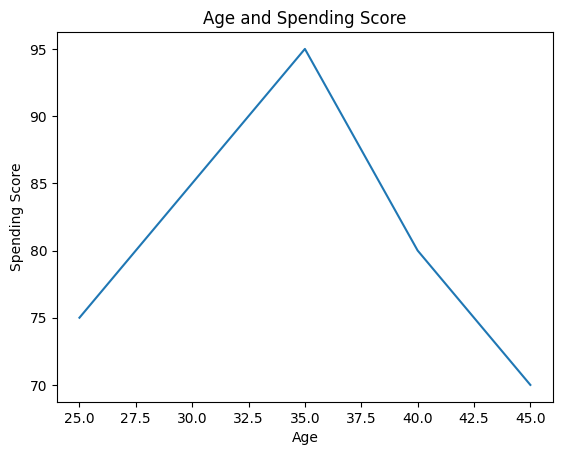

In [8]:
sns.lineplot(x='age', y='spending_score', data=df)
plt.title('Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# Задание 3. Взаимосвязь между зарплатой и бонусами. Создайте точечный график, где по оси X будет отображаться зарплата (salary), а по оси Y — бонусы (bonus). Размер точек на графике должен быть пропорционален количеству лет в компании (years_at_company). Этот график позволит исследовать взаимосвязь между зарплатой и бонусами и оценить влияние стажа на размер бонусов.


In [9]:
df.isnull().sum()

,0
age,0
income,0
education_level,0
spending_score,0
job_title,0
salary,0
bonus,0
years_at_company,0
performance_score,0
department,0


Text(0, 0.5, 'Bonus')

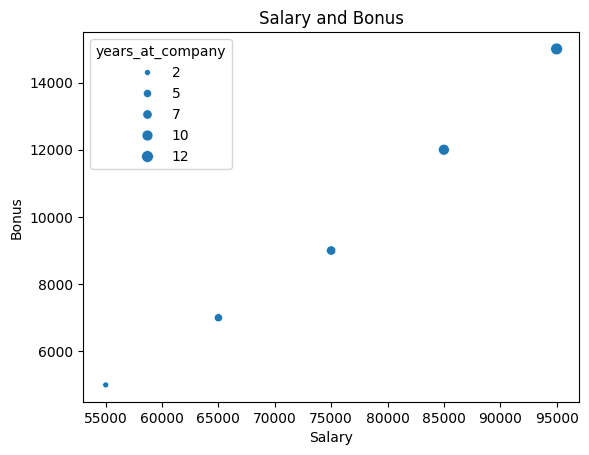

In [15]:
sns.scatterplot(data = df, x = 'salary', y = 'bonus', size ='years_at_company')
plt.title('Salary and Bonus')
plt.xlabel('Salary')
plt.ylabel('Bonus')
